<a href="https://colab.research.google.com/github/FacuHerrera00/Car-Sales/blob/main/ProyectoDS_ParteII_%2BELIA%2BHERRERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
%pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
mpl.style.use('bmh')

In [52]:
%ls /content/drive/MyDrive/DataScience/Datasets/Proyecto/

 car_price_prediction.csv   Desafìo2_car_sales.ipynb
 Car_sales.csv              desafio2.ipynb
'Car Sales Graficos.gdoc'   ProyectoDS_ParteII_+ELIA+HERRERA


In [53]:
%cd /content/drive/MyDrive/DataScience/Datasets/Proyecto/

/content/drive/MyDrive/DataScience/Datasets/Proyecto


In [54]:
df_car_price_prediction = pd.read_csv('car_price_prediction.csv')
print (df_car_price_prediction)

             ID  Price  Levy   Manufacturer    Model  Prod. year   Category Leather interior  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep              Yes   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep               No   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback               No   
3      45769185   3607   862           FORD   Escape        2011       Jeep              Yes   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback              Yes   
...         ...    ...   ...            ...      ...         ...        ...              ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe              Yes   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan              Yes   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep              Yes   
19235  45793526   5331  1288      CHEVRO

In [55]:
df_car_price_prediction.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [56]:
df_car_price_prediction.columns = ['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']
df_car_price_prediction.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category', 'Leather_interior',
       'Fuel_type', 'Engine_volume', 'Mileage', 'Cylinders', 'Gear_box_type', 'Drive_wheels',
       'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [57]:
df_car_price_prediction.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [58]:
print(df_car_price_prediction.groupby('Manufacturer').head(25))

             ID  Price  Levy Manufacturer    Model  Prod_year   Category Leather_interior  \
0      45654403  13328  1399        LEXUS   RX 450       2010       Jeep              Yes   
1      44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep               No   
2      45774419   8467     -        HONDA      FIT       2006  Hatchback               No   
3      45769185   3607   862         FORD   Escape       2011       Jeep              Yes   
4      45809263  11726   446        HONDA      FIT       2014  Hatchback              Yes   
...         ...    ...   ...          ...      ...        ...        ...              ...   
18861  45781786   4500     -        VOLVO      S70       1998      Sedan               No   
18963  45780821     33  2308       HUMMER       H3       2007       Jeep               No   
19041  45792773   3200     -          GAZ       20       1953       Jeep               No   
19088  45782030   2200     -      PEUGEOT      406       2001      Sed

In [59]:
df_car_price_prediction = df_car_price_prediction.replace('-', np.nan)
print(df_car_price_prediction)

             ID  Price  Levy   Manufacturer    Model  Prod_year   Category Leather_interior  \
0      45654403  13328  1399          LEXUS   RX 450       2010       Jeep              Yes   
1      44731507  16621  1018      CHEVROLET  Equinox       2011       Jeep               No   
2      45774419   8467   NaN          HONDA      FIT       2006  Hatchback               No   
3      45769185   3607   862           FORD   Escape       2011       Jeep              Yes   
4      45809263  11726   446          HONDA      FIT       2014  Hatchback              Yes   
...         ...    ...   ...            ...      ...        ...        ...              ...   
19232  45798355   8467   NaN  MERCEDES-BENZ  CLK 200       1999      Coupe              Yes   
19233  45778856  15681   831        HYUNDAI   Sonata       2011      Sedan              Yes   
19234  45804997  26108   836        HYUNDAI   Tucson       2010       Jeep              Yes   
19235  45793526   5331  1288      CHEVROLET  Capti

                                                           *ABSTRACT*
**PROPÓSITO**: 

La interpretación de los datos incluidos en el dataset y su entendimiento podría dar información acerca de las
características claves de los automóviles mas vendidos. Con esto podría entender el público que deberían conquistar las empresas y a que apuntar a la hora del diseño
de sus productos.
Se busca aplicar los conocimientos volcados durante la cursada de Data Science/Coderhouse para crear gráficas y utilizar herramientas que sean útiles 
en la búsqueda de respuestas a las hipotesis planteadas y análisis de resultados.
Las hipótesis principales son existen características de comodidad y seguridad influyentes en las ventas? Que hay de acuerdo a la mecánica del auto tal como combustible, tipod e caja, etc.

La mayoría de ventas de autos se han producido en autos automáticos independientemente de su combustible aunque hay una predominancia de petroleo. Además son en la mayoría
coches tipo "sedán" con una cantidad airbags predominantes < 6. Por otra parte, la cantidad de cilindros buscados en su mayoría es de  "4" por lo que la cilindrada buscada 
ronda en valores bajos. Las ventas se han dado a en su mayoria con valores de volumenes menor de combustible


HIPOTESIS:  

*   Existe una predominancia en ventas de coches sedán.
*   ¿La seguridad es un factor importante a la hora de la compra de un autotomovil?
*   En un futuro cuanto será el porcentaje de autos con turbo. 
*   Futuros precios de los coches.




           

**OBJETIVOS**


En este paper estableceremos las comprension y estudio de variables acerca de las ventas realizadas en las ventas de autos de una concesionaria. Desarrollando el análisis se espera poder comprender que rango o sesgo aplicar para obtener un mayor numero de ventas de autos de acuerdo al público a la que se expone la companía.

**INTRODUCCIÓN**


*Contexto empresarial*: Somos un grupo contratista de cientificos de datos contratados para elevar las ventas de la companía, la empresa se encuentra localizada en una ciudad mediana-grande. Esta empresa se dedica a re-vender coches usados de todo tipo de clientes. Durante el último tiempo se han avocado a recompilar datos de las ventas de su competencia a la que le ha ido bien y, de hecho, ha aumentado sus ventas. 

*Problema empresarial*: Se han registrado una baja de ventas durante los últimos dos años, la jefatura desconoce porqué.

*Contexto analítico*. Un antiguo empleado de recursos humanos le ha proporcionado una base de datos de empleados que contiene información de su competencia, incluyendo datos de sus ventas. La informaciòn brindada cuenta los siguientes datos: ID,	precio,	impuesto,	fabricante,	modelo,	año de fabricación,	categoría, 	cuero_interior,	tipo_de_combustible,	Volumen de motor, 	Millaje,	cilindros, tipo de caja, tracción,	puertas, rueda,	color,	airbags.

El caso está estructurado de la siguiente manera: (1) realizaremos un análisis de datos exploratorio para investigar visualmente las variables puestas en juego; (2) utilizar los conocimientos observados para ajustar formalmente los modelos de regresión; y finalmente (3) abordar las recomendaciones hacia la gerencia.

In [60]:
df_car_price_prediction.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [61]:
df_car_price_prediction.shape

(19237, 18)

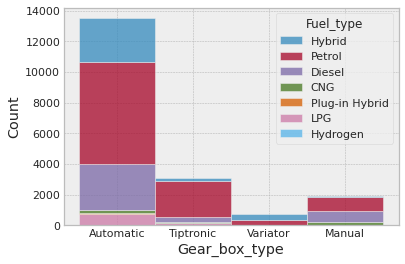

In [62]:
sns.histplot(data=df_car_price_prediction, x="Gear_box_type", hue="Fuel_type", multiple="stack");

In [63]:
df = df_car_price_prediction

## Comprobar la cantidad de valores NaN

In [64]:
df.isnull().sum(axis=0)

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage                0
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

"Levy" tiene 5819 valores nulos.

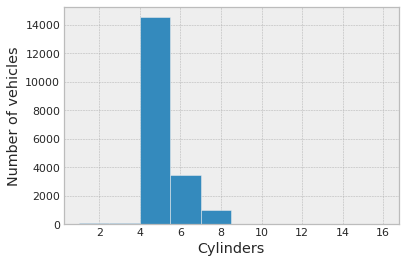

In [65]:
plt.hist(df['Cylinders'],10)
plt.xlabel('Cylinders')
plt.ylabel('Number of vehicles');

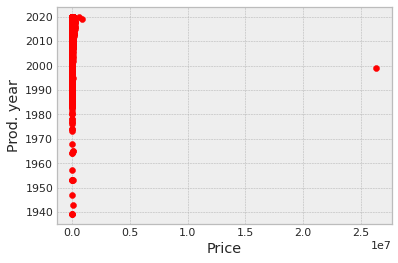

In [66]:
plt.scatter(df.Price, df.Prod_year,color=['red'])
plt.xlabel('Price')
plt.ylabel('Prod. year')
plt.show()
##Eliminar outlier para mejor visualización

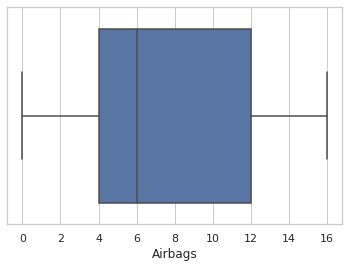

In [67]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Axis-level
ax = sns.boxplot(x=df["Airbags"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

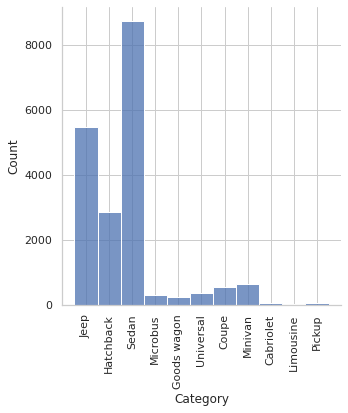

In [68]:
sns.displot(data=df, x="Category")
ax.set_xlabel('Categoría')
plt.xticks(rotation=90)

In [69]:
df['Levy'] = df['Levy'].replace(np.nan, 0).astype(int)

In [70]:
df['Price'] = df['Price'].replace(np.nan, 0).astype(int)

EDA y preprocesamiento de los datos

In [71]:
df.dtypes

ID                    int64
Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod_year             int64
Category             object
Leather_interior     object
Fuel_type            object
Engine_volume        object
Mileage              object
Cylinders           float64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [72]:
df.isnull().sum(axis=0)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [73]:
len(df[df.Levy=='-'])

0

In [74]:
len(df[df.Levy==0])

5819

In [75]:
df.Levy = df.Levy.replace('-',0).astype('int64')

In [76]:
#preguntar
df.Mileage = df.Mileage.str.replace(r'([a-z])','').astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [77]:
cat_col = list(df.select_dtypes('O').columns)
num_col = list(df.select_dtypes(np.number).columns)

In [78]:
for i in cat_col:
    print(i,df[i].unique(),sep=':\n',end='\n\n')

Manufacturer:
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']

Model:
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']

Category:
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather_interior:
['Yes' 'No']

Fuel_type:
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Engine_volume:
['3.5' '3' '1.3' '2.5' '2' '1.8'

In [79]:
#Algunos de los motores tienen turbo, hay que diferenciarlos porque tienen numeros contínuos.
df['Turbo'] = df['Engine_volume'].str.strip().apply(lambda x : 'Yes' if len(x) > 3 else 'No')

In [80]:
df['Engine_volume'] = df['Engine_volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [81]:
df['Doors'] = df['Doors'].str.replace('02-Mar','2-3').replace('04-May','4-5')
#volvimos a cambiarlo a una variable categórica

In [82]:
df['Cylinders'] = df['Cylinders'].astype('O')
df['Airbags'] = df['Airbags'].astype('O')
df['Prod_year'] = df['Prod_year'].astype('O')

In [83]:
df.describe()

,ID,Price,Levy,Engine_volume,Mileage
count,1.924e+04,1.924e+04,19237.000,19237.000,1.924e+04
mean,4.558e+07,1.856e+04,632.529,2.308,1.532e+06
std,9.366e+05,1.906e+05,567.722,0.878,4.840e+07
min,2.075e+07,1.000e+00,0.000,0.000,0.000e+00
25%,4.570e+07,5.331e+03,0.000,1.800,7.014e+04
50%,4.577e+07,1.317e+04,642.000,2.000,1.260e+05
75%,4.580e+07,2.208e+04,917.000,2.500,1.889e+05
max,4.582e+07,2.631e+07,11714.000,20.000,2.147e+09


In [84]:
df_new = df.copy()

In [85]:
q1=df_new.quantile(0.25)
q3=df_new.quantile(0.75)
iqr = q3-q1
len(df_new[((df_new>q3+3*iqr) | (df_new<q1-3*iqr)).any(axis=1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


2612

In [86]:
df_new = df_new[~(((df_new>q3+3*iqr) | (df_new<q1-3*iqr)).any(axis=1))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [87]:
df_new.shape

(16625, 19)

In [88]:
df.shape

(19237, 19)

In [89]:
cat_col = list(df.select_dtypes('O').columns)
num_col = list(df.select_dtypes(np.number).columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

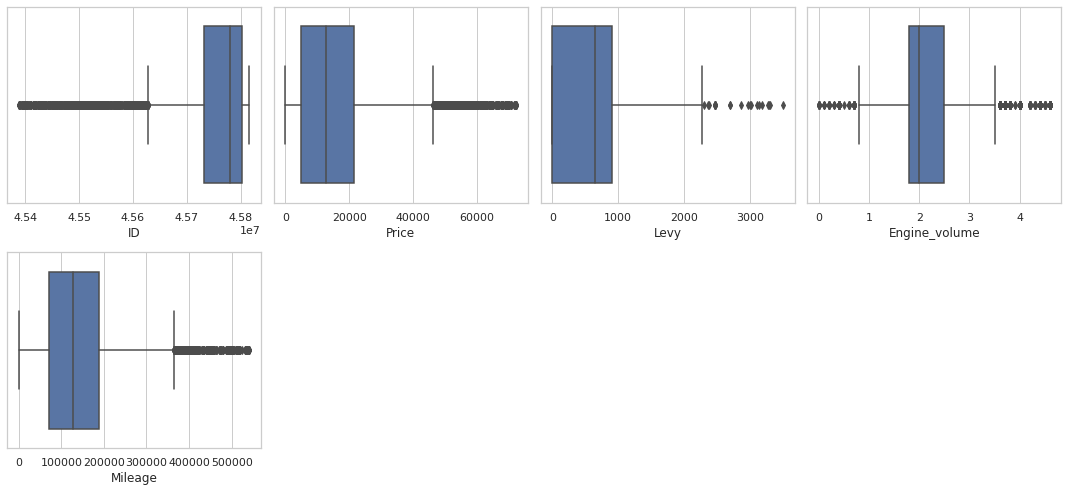

In [90]:
plt.figure(figsize=[15,7])
for i,j in enumerate(num_col):
    plt.subplot(2,4,i+1)
    sns.boxplot(df_new[j])
    plt.tight_layout()
plt.show()

In [91]:
#En este caso, el ID no nos sirve de utilidad, se haría un drop de la columna.
num_col.remove('ID')
df_new.drop(columns='ID',inplace=True)

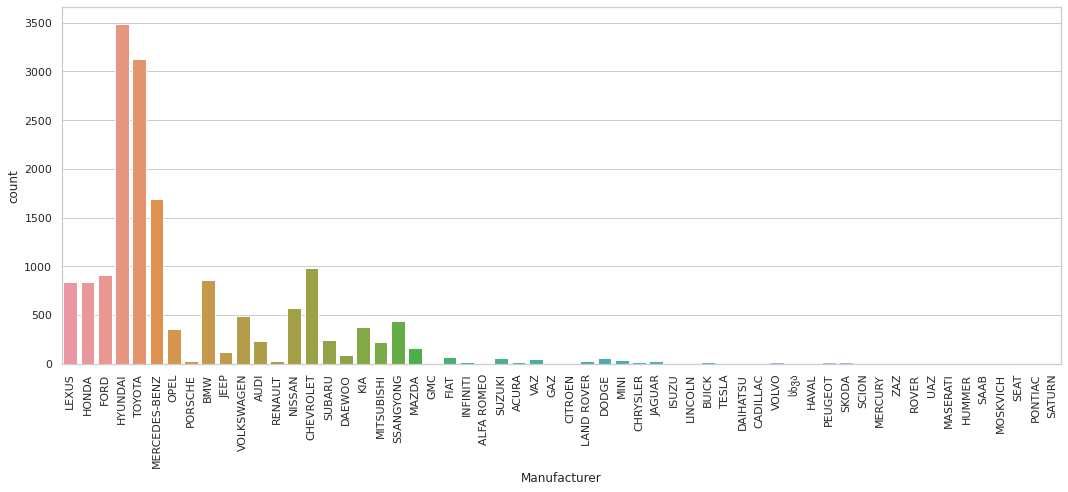

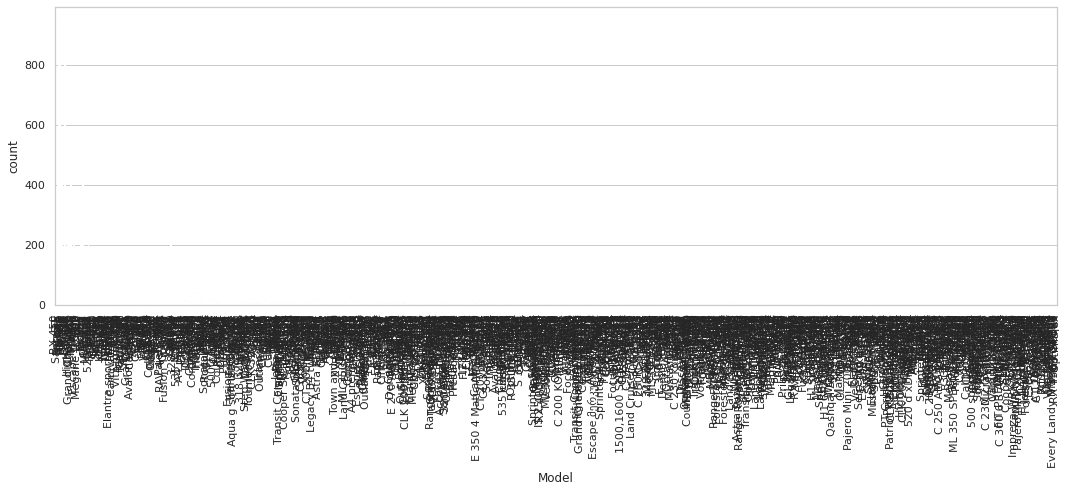

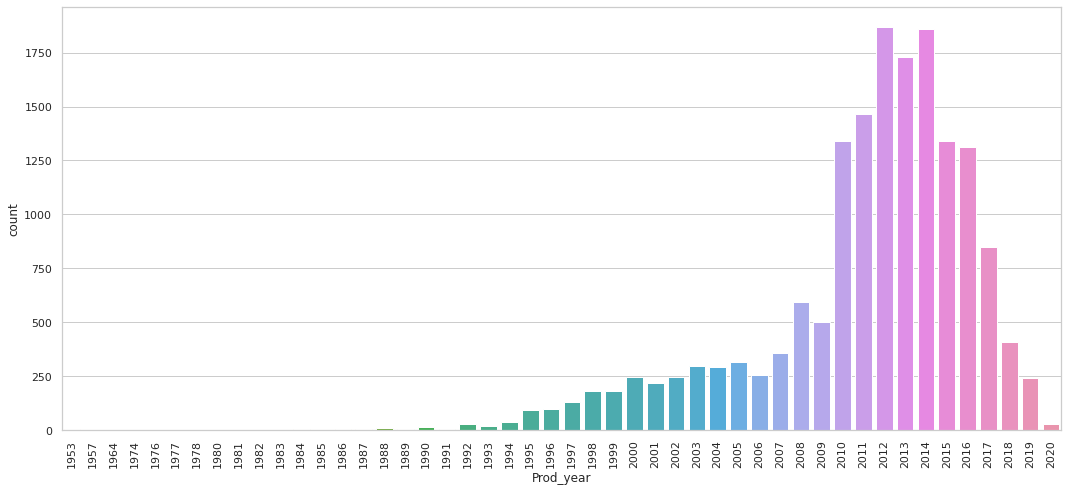

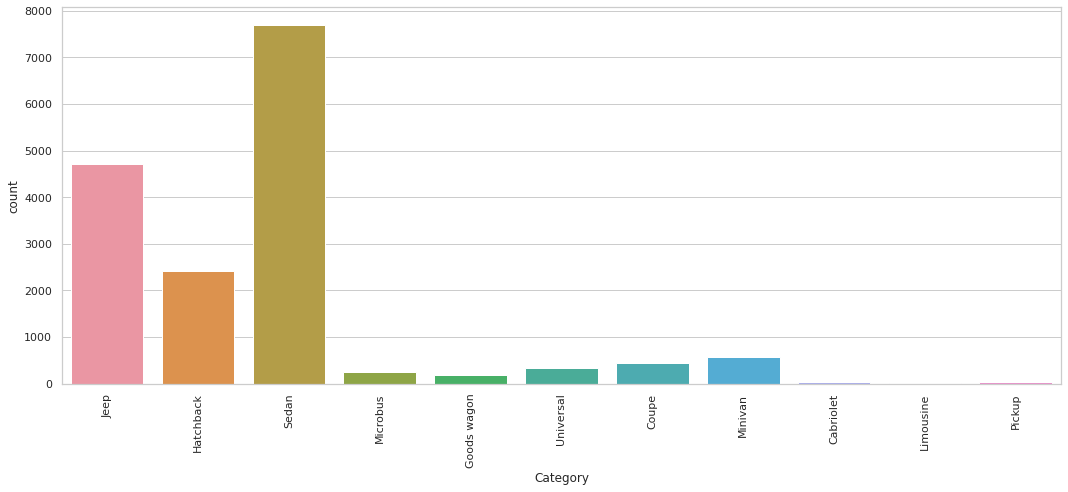

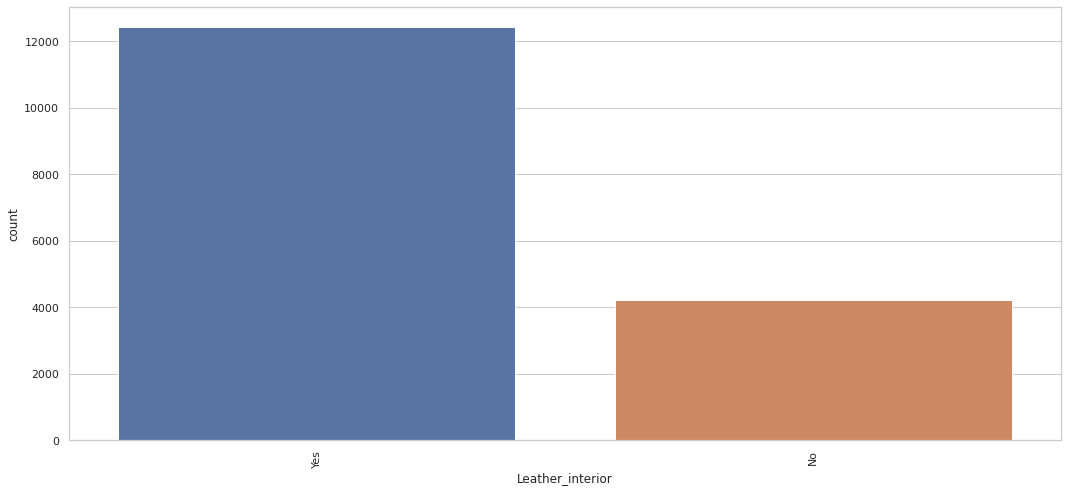

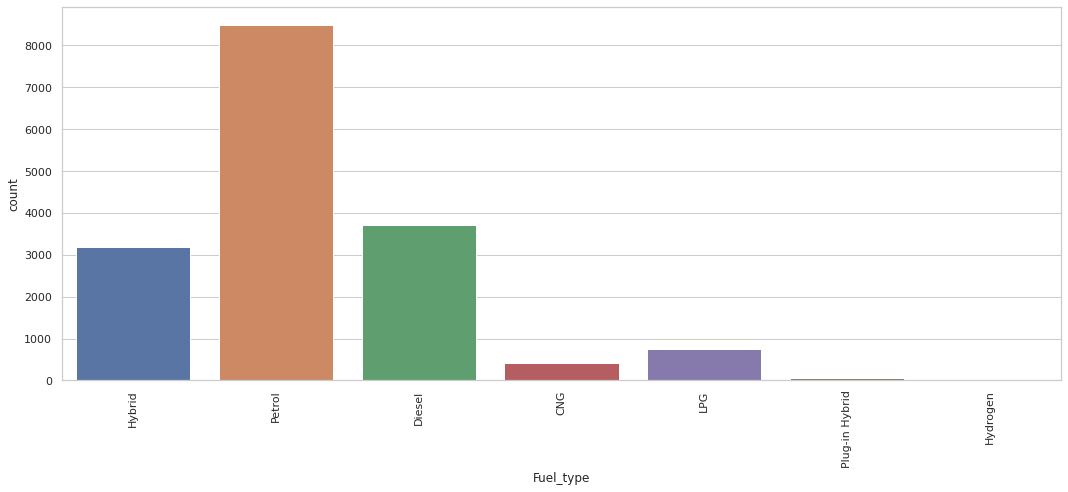

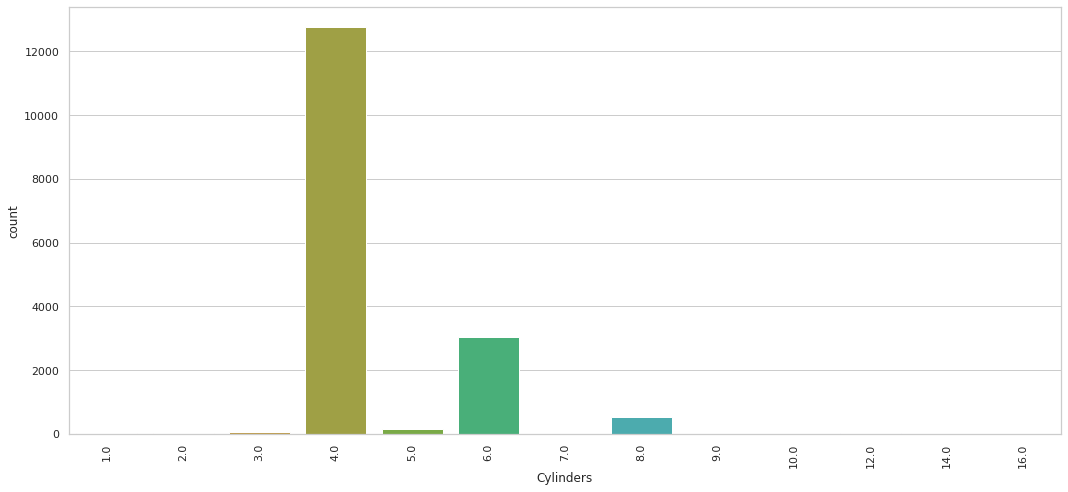

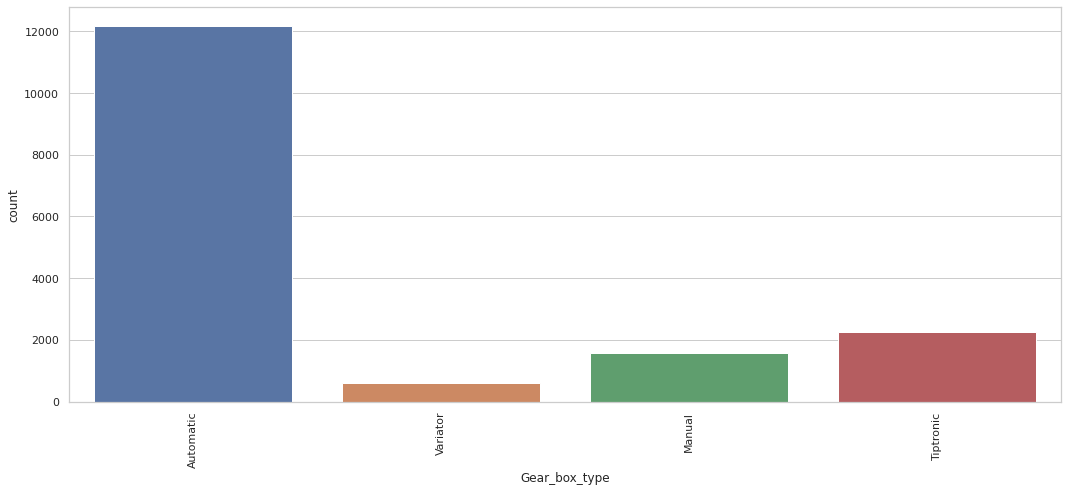

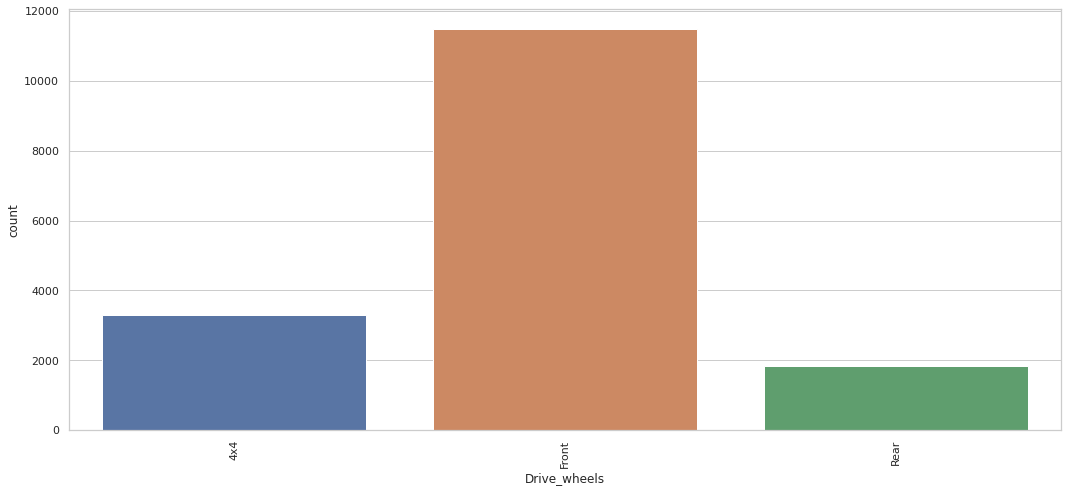

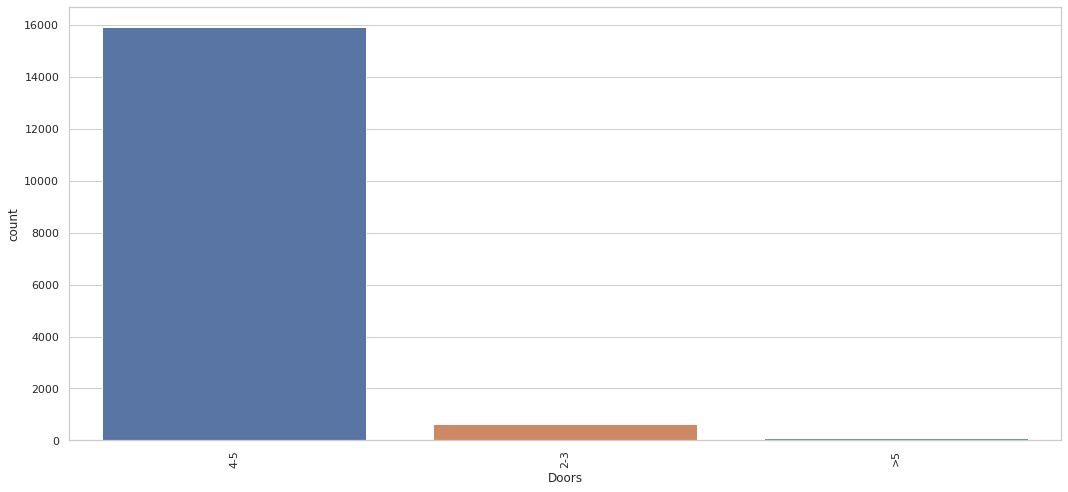

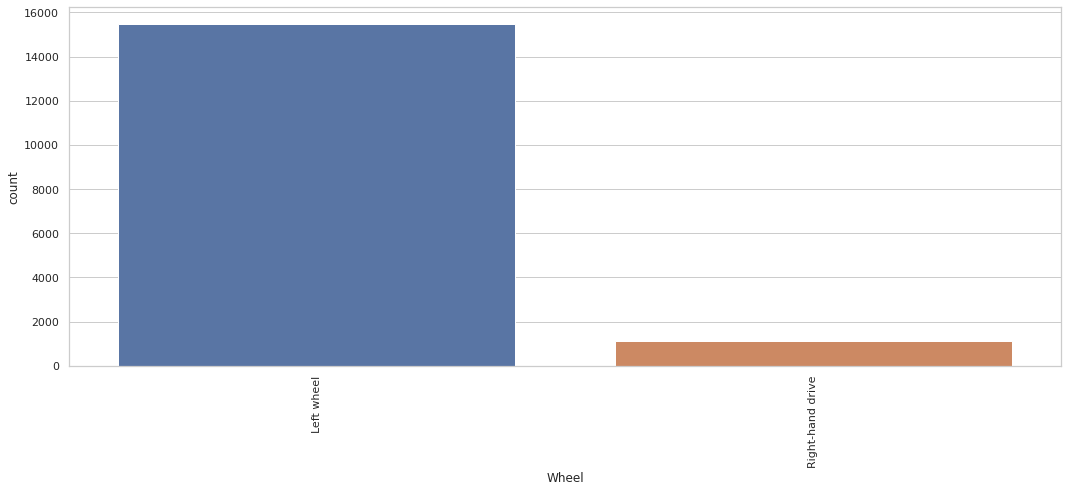

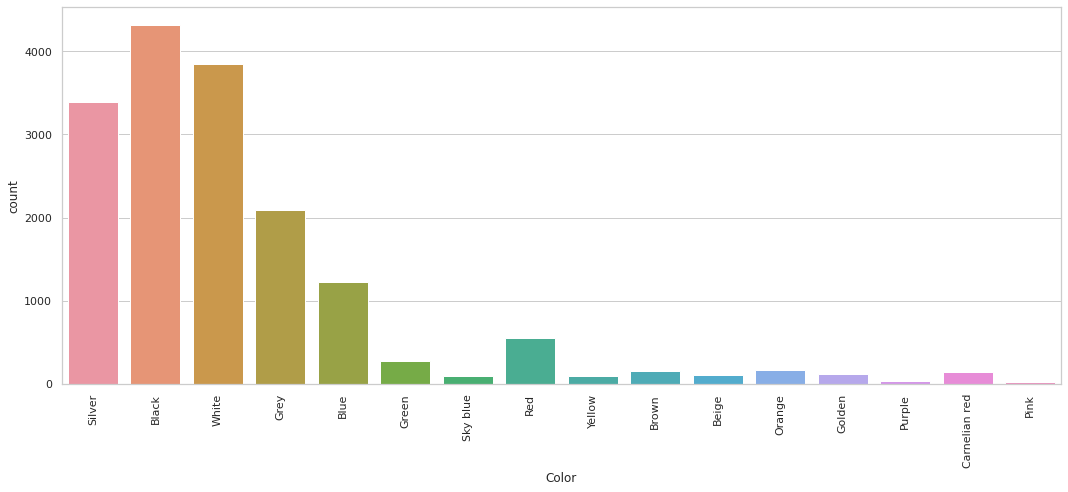

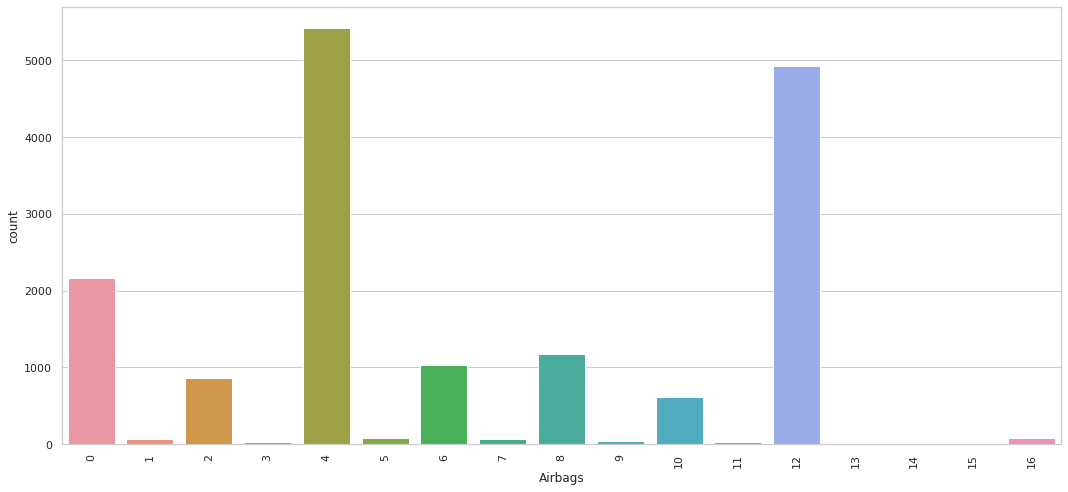

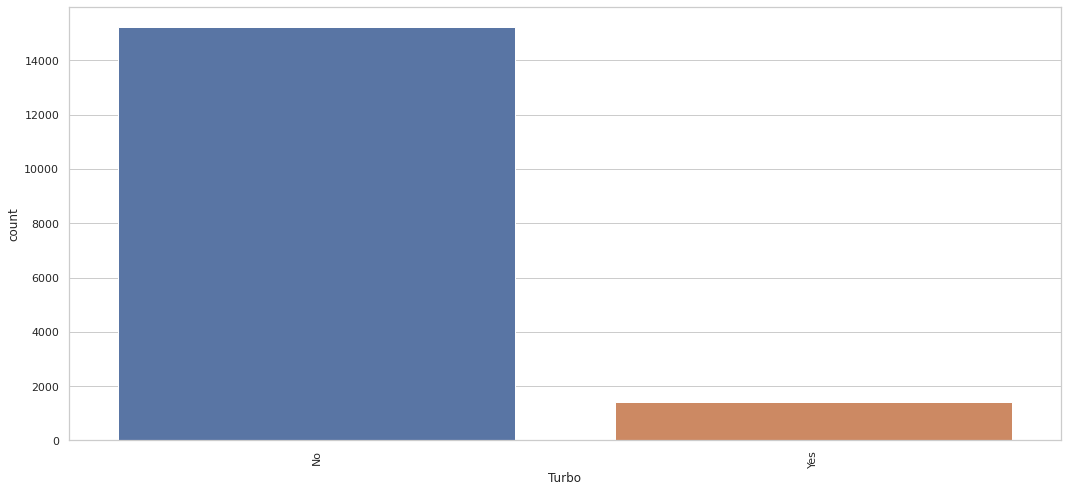

In [92]:
for i in cat_col:
        plt.figure(figsize=[15,7])
        sns.countplot(x=df_new[i])
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [93]:
##Tomando la opcion de turbo si/no como variable Y para un futuro modelo supervisado, podemos aplicar Class Distribution.
turbo_count = df_new.groupby("Turbo").size()
print(turbo_count)

Turbo
No     15217
Yes     1408
dtype: int64


Se puede ver que hay casi 14 veces más autos sin turbo dentro de las ventas.



In [94]:
##Viendo la posibilidad de que variables tengan correlacion podemos usar una Pearson's Correlation Coefficient, que asume distribuciones normales entre los atributos.
pd.set_option("display.width",100)
pd.set_option("precision",3)
correlations = df_new.corr(method="pearson")
print(correlations)

               Price   Levy  Engine_volume  Mileage
Price          1.000  0.055          0.036   -0.210
Levy           0.055  1.000          0.413    0.002
Engine_volume  0.036  0.413          1.000    0.173
Mileage       -0.210  0.002          0.173    1.000


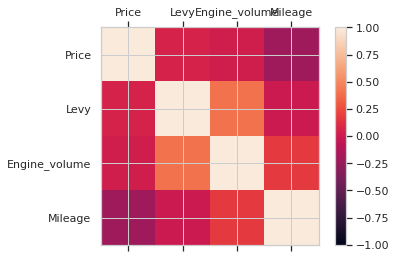

In [105]:
##Trataremos de grafic,arlo para que pueda verse.
fig = mpl.pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_col)
ax.set_yticklabels(num_col)
mpl.pyplot.show()

In [97]:
fig = px.treemap(data_frame=df_new,path=["Manufacturer","Category","Model"],title='Manofactura y Modelos')
fig.show()

En este caso se puede ver mejor graficado la diferencia de modelos y la predominancia de los sedan en HYUNDAI, seguido por TOYOTA y MERCEDES-BENZ

In [108]:
fig = px.treemap(data_frame=df_new,path=["Manufacturer","Category","Model"],values="Price",title='Manofactura y Modelos sobre Precios')
fig.show()

In [109]:
num_col

['Price', 'Levy', 'Engine_volume', 'Mileage']

In [110]:
cat_col

['Manufacturer',
 'Model',
 'Prod_year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Cylinders',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Turbo']